Text(0, 0.5, 'variances_squqared')

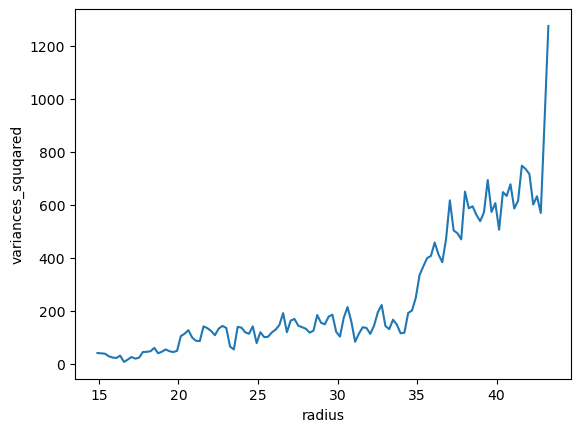

In [7]:
import calc
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(calc)
from calc import Hyperuniform_helper

file_name = 'positions.txt'
data = np.loadtxt(file_name)
rho, box_length, volume_fraction = data[0]
radius = np.linspace(box_length/5.8, box_length/2,120)
scaled_variances = np.zeros(len(radius))
helper = Hyperuniform_helper(radius[0], np.zeros(3), data[1:,], rho)
for i in range(len(radius)):
    helper.set_radius(radius[i])
    r, gr = helper.calculate_radial_distribution(40, 2)
    r_fit, g_fit = helper.g_fit(r, gr)
    k_values = np.sort(2*np.pi/r_fit[1:])
    sk = helper.hankel_transform_2d(gr, r, k_values)
    variance_square = helper.variance_calculations_in_reciprocal_space_2d(sk, k_values)
    scaled_variances[i] = variance_square

plt.plot(radius, scaled_variances)
plt.xlabel("radius")
plt.ylabel("variances_squqared")

In [8]:
print(scaled_variances)

[  40.17753786   39.01587546   37.52511611   27.90393847   23.16085909
   21.57802811   30.31729535    6.63876161   15.48542515   25.11190465
   18.94729004   23.00586526   44.15250003   44.70726758   46.8570059
   59.69801931   39.30700335   45.16438577   53.66921142   46.96367909
   43.80062452   48.32603594  103.97528615  113.03940925  126.48829766
   98.43793313   86.48071704   85.13805758  140.71480263  134.14960634
  123.22305841  107.50497764  132.40880786  142.34984896  134.7866371
   64.36190638   53.90043707  138.9406598   135.98302686  118.33040928
  112.86598939  140.80404032   77.88621061  118.70745409  100.20083945
  101.39234462  117.63670849  128.49113644  145.47433529  190.63030784
  118.66857585  162.86331133  168.63116686  143.19743509  137.68078325
  131.83942395  117.11495991  124.41090318  183.47327062  154.35742976
  148.69327553  177.27737565  184.89692638  120.37471927  102.22876071
  173.50594582  213.69067342  158.80187559   82.72285344  113.43192531
  137.45

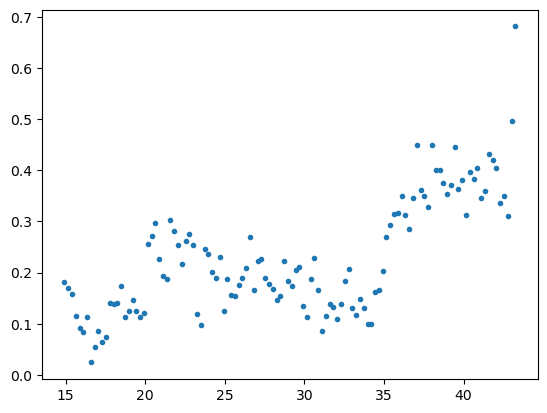

In [9]:
indexes= scaled_variances>0
variances_radius_ratio = (scaled_variances[indexes])/(radius[indexes])**2
plt.plot(radius[indexes], variances_radius_ratio, '.')